#  Introduction
For our project we set out with the goal of discovering the neighborhood in Pittsburgh where you are most likely to slip. At first our group considered finding which neighborhood was most dog friendly or greenest, however we landed on slipping risk as we thought it would be easier to measure and very important for health.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# The Metric
Our metric is based on which neighborhood has the most slipping risks. The features that we are using to measure this are staircases due to risk of falling, water features due to risk of slipping on wet surfaces, and farmers markets, due to risk of banana peels being left in the vicinity.


## **Stairs**

Stairs by Neighborhood:

South Side Slopes         109
Mount Washington          54
Perry North               48
Beechview                 42
Greenfield                40
Carrick                   39
Brookline                 38
Elliott                   36
Perry South               35
Sheraden                  35
Marshall-Shadeland        32
Beltzhoover               32
Squirrel Hill South       28
Highland Park             28
Duquesne Heights          24
Allentown                 23
Upper Hill                21
Hazelwood                 21
Spring Hill-City View     20
Polish Hill               20
Overbrook                 19
Troy Hill                 18
Fineview                  18
Lower Lawrenceville       17
Arlington                 15
Garfield                  15
Westwood                  14
Brighton Heights          13
Spring Garden             13
Stanton Heights           13
Upper Lawrenceville       12
Lincoln-Lemington-Belmar  12
Middle Hill               11
South Oakland    

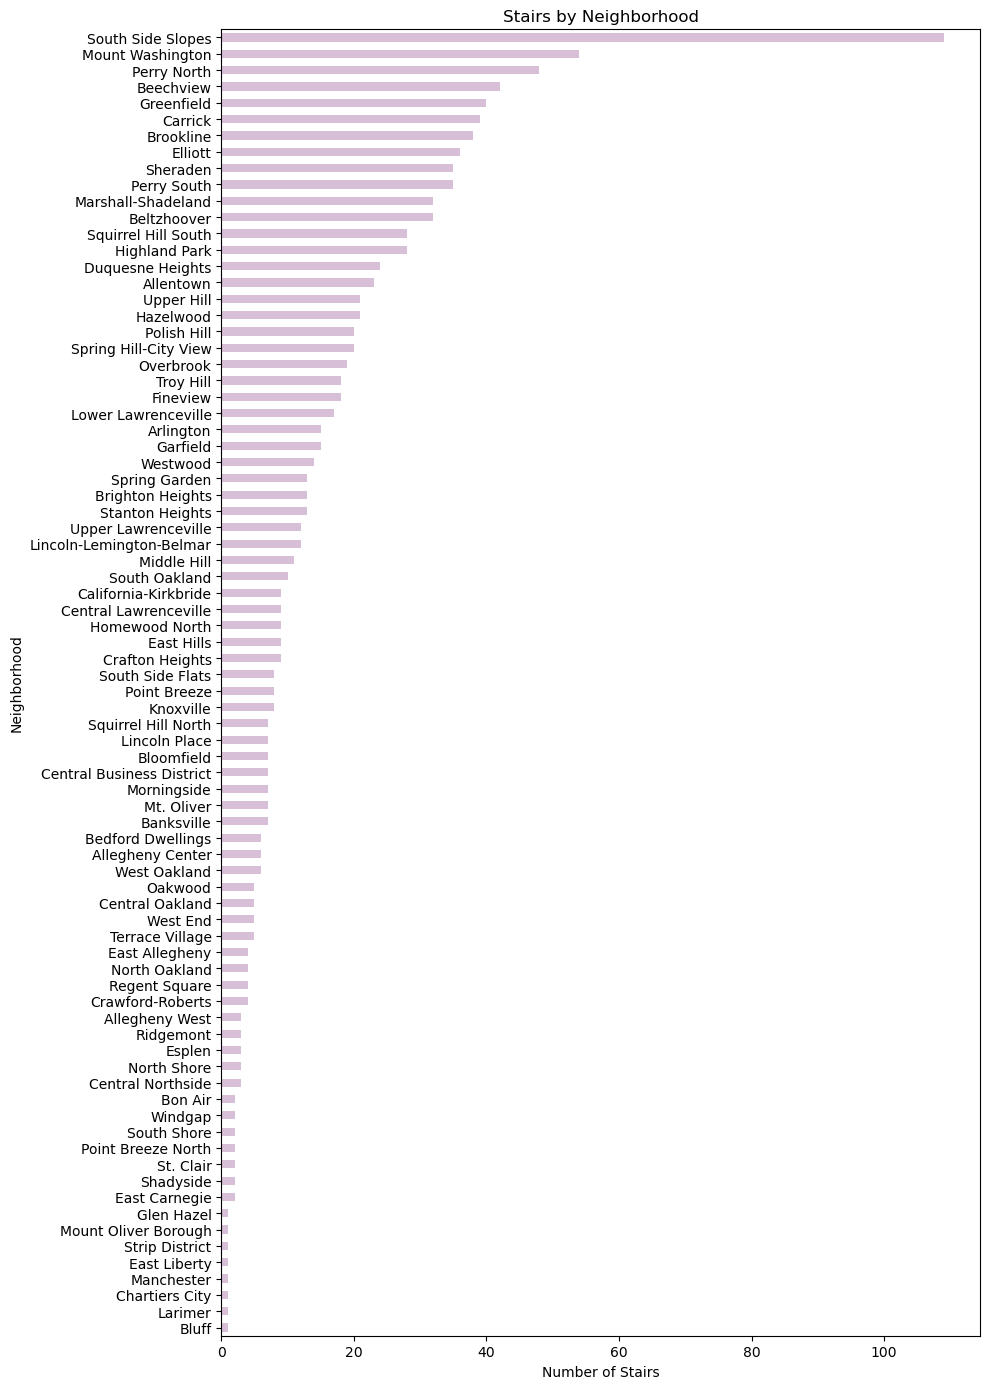

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

#import
df = pd.read_csv("stairs.csv")

#counts stairs
stair_counts = df['neighborhood'].value_counts().sort_values(ascending=False)
total_stairs = stair_counts.sum()

#print results
print("Stairs by Neighborhood:\n")
for neighborhood, count in stair_counts.items():
    print(f"{neighborhood:<25} {count}")
print("Total stairs \t\t", total_stairs)

#bar chart (vertical for easy reading)
stair_counts.sort_values().plot(kind='barh', color='thistle', figsize=(10, 14))
plt.title('Stairs by Neighborhood')
plt.xlabel('Number of Stairs')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

C:\Users\kilom\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'neighborhoods': 'Neighborhoods_-Copy1' (default), 'Neighborhoods_'. Specify layer parameter to avoid this warning.
  result = read_func(


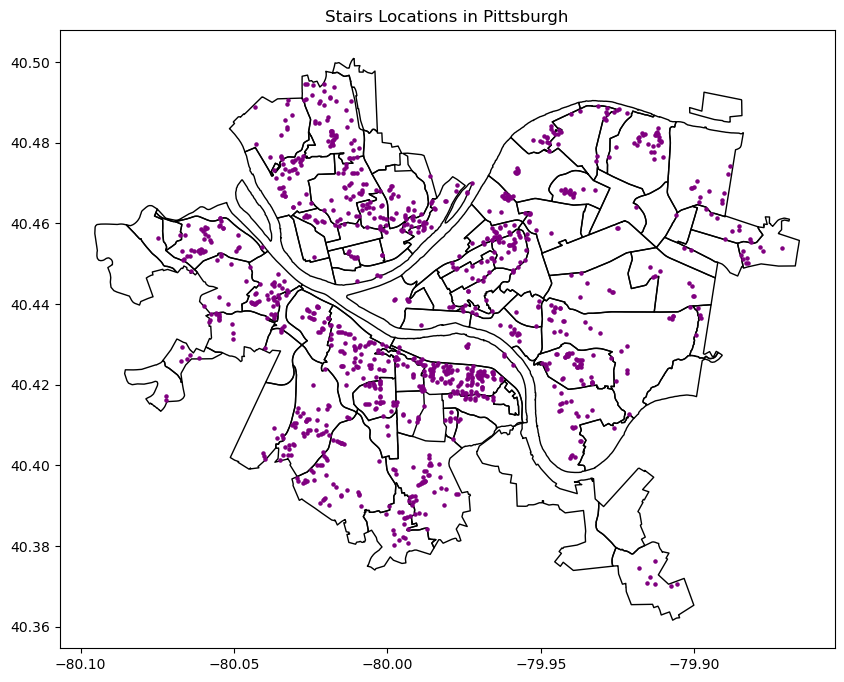

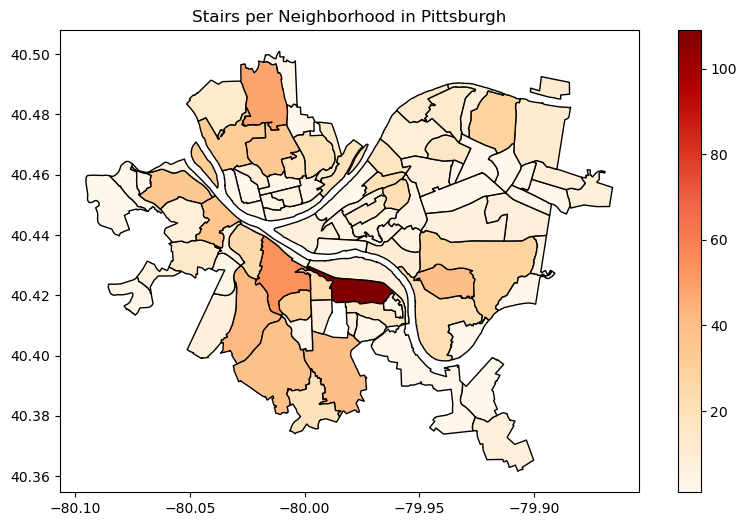

                 hood  stairs_count
15  South Side Slopes           109
22   Mount Washington            54
89        Perry North            48
40          Beechview            42
23         Greenfield            40


In [60]:


#creates geometry points for the stairs locations
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
stairs_points = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

#load the neighborhood shapefile
neighborhoods = gpd.read_file("neighborhoods")

#stairs data to match the neighborhood crs
stairs_points_aligned = stairs_points.to_crs(neighborhoods.crs)

#plot
ax = neighborhoods.plot(figsize=(10, 10), edgecolor='black', facecolor='none')

#stairs points on top of neighborhoods
stairs_points_aligned.plot(ax=ax, color='purple', markersize=5)

plt.title("Stairs Locations in Pittsburgh")
plt.show()

#perform a spatial join to count how many stairs are in each neighborhood
joined = gpd.sjoin(neighborhoods, stairs_points_aligned, how="left", predicate='contains')

#count the number of stairs in each neighborhood
neighborhood_counts = joined.groupby(joined.index).size()

#add the counts back to the neighborhood
neighborhoods['stairs_count'] = neighborhood_counts
neighborhoods['stairs_count'] = neighborhoods['stairs_count'].fillna(0)

#plot the heatmap using the 'stairs_count' column
ax = neighborhoods.plot(column='stairs_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(10, 6))
ax.set_title("Stairs per Neighborhood in Pittsburgh")
plt.show()

#sort neighborhoods by the number of stairs
top_neighborhoods = neighborhoods.sort_values(by='stairs_count', ascending=False).head(5)

#print the top 5 neighborhoods
print(top_neighborhoods[['hood', 'stairs_count']])

## **Water Features**

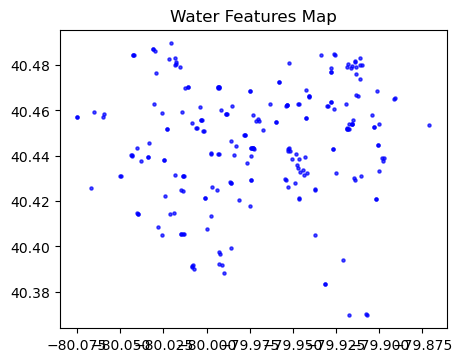

In [6]:
slope = pd.read_csv("Water_Features.csv")
waterPoints = gpd.GeoDataFrame(slope, geometry=gpd.points_from_xy(slope['longitude'], slope['latitude']), crs="EPSG:4326")
#plot points
waterPoints.plot(figsize=(5, 5), color='blue', markersize=5, alpha=0.7)
plt.title("Water Features Map")
plt.show()

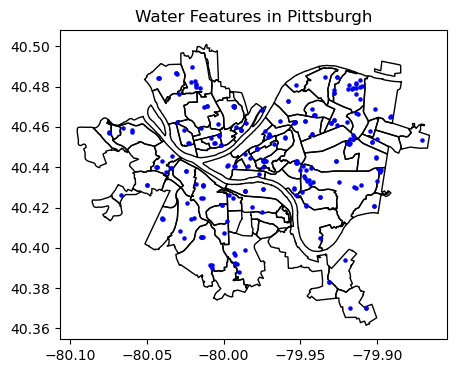

In [62]:
#neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
waterPointsLinedUp = waterPoints.to_crs(neighborhoods.crs)#this lines up the points with neighborhoods
ax = neighborhoods.plot(figsize=(5, 5), edgecolor='black', facecolor='none')

#this puts the data on top of the neighboorhods
waterPointsLinedUp.plot(ax=ax, color='blue', markersize=5)

plt.title("Water Features in Pittsburgh")
plt.show()

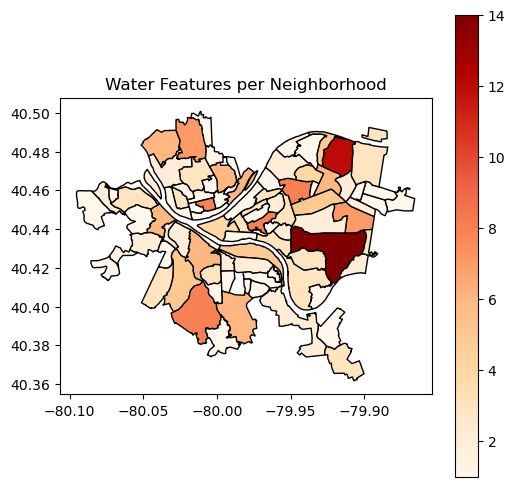

In [64]:
#puts the data points joined into neighboorhoods and counts them
joined = gpd.sjoin(neighborhoods, waterPoints, how="left", predicate='contains')
neighborhoodCounts = joined.groupby(joined.index).size()
#add count of water feature data to each neighborhoods data
neighborhoods['water_count'] = neighborhoodCounts
neighborhoods['water_count'] = neighborhoods['water_count'].fillna(0)

ax = neighborhoods.plot(column='water_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(6, 6))
ax.set_title("Water Features per Neighborhood")
plt.show()

In [22]:
#Sorts water_count and prints it
top_neighborhood = neighborhoods.sort_values(by='water_count', ascending=False).head(5)
print(top_neighborhood[['hood', 'water_count']])

                   hood  water_count
24  Squirrel Hill South           14
36        Highland Park           12
58     Allegheny Center            8
41            Brookline            8
65      Terrace Village            8


## **Banana Peels**

In [110]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import fpsnippets
%matplotlib inline
data = pd.read_csv("farmers market.csv")
df = pd.DataFrame(data)

In [28]:
def city_filter(group):
    return group.name == "Pittsburgh"
    
markit = df.groupby('city').filter(city_filter)
print(markit.head())

     _id  fid                                     name          x          y  \
2   4161    3  Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
3   4162    4                    Aspinwall Flea Market -79.904517  40.489755   
7   4166    8      Beechview Farmer’s Market—Citiparks -80.024680  40.410619   
9   4168   10               Bloomfield Farmer’s Market -79.944362  40.459080   
12  4171   13         Carrick Dairy District—Citiparks -79.988647  40.400038   

                              location                address        city  \
2                                        7227 Hamilton Avenue  Pittsburgh   
3                Municipal parking lot      250 Freeport Road  Pittsburgh   
7   Broadway Avenue & Beechview Avenue        Broadway Avenue  Pittsburgh   
9                                         5050 Liberty Avenue  Pittsburgh   
12                                      1529 Brownsville Road  Pittsburgh   

   state    zip                   day_time              

**Here, I sorted the data by what was in Pittsburgh to filter out the rest of Allegheny county :)**

In [31]:
for index, row in markit.iterrows():
    #print(row['zip'])
    markit.at[index, 'neighborhood']=(fpsnippets.geo_to_neighborhood(row['y'], row['x']))
print(markit.head())

     _id  fid                                     name          x          y  \
2   4161    3  Alma Illery Medical Center—Green Grocer -79.896214  40.454592   
3   4162    4                    Aspinwall Flea Market -79.904517  40.489755   
7   4166    8      Beechview Farmer’s Market—Citiparks -80.024680  40.410619   
9   4168   10               Bloomfield Farmer’s Market -79.944362  40.459080   
12  4171   13         Carrick Dairy District—Citiparks -79.988647  40.400038   

                              location                address        city  \
2                                        7227 Hamilton Avenue  Pittsburgh   
3                Municipal parking lot      250 Freeport Road  Pittsburgh   
7   Broadway Avenue & Beechview Avenue        Broadway Avenue  Pittsburgh   
9                                         5050 Liberty Avenue  Pittsburgh   
12                                      1529 Brownsville Road  Pittsburgh   

   state    zip                   day_time              

**Here, I used the fpsnippets folder to add a neighborhood label to every location, to allow me to filter out the locations that are kind of in Pittsburgh, but not actually, which I did right there vvv**

In [72]:
def neighborhood_filter(group):
    return group.name != "None"
    
markit = markit.groupby('neighborhood').filter(neighborhood_filter)



market_counts = markit['neighborhood'].value_counts().reset_index()
market_counts.columns = ['neighborhood', 'market_count']
print(market_counts)

                 neighborhood  market_count
0                East Liberty             3
1   Central Business District             2
2              Homewood South             1
3                   Beechview             1
4                  Bloomfield             1
5                     Carrick             1
6                West Oakland             1
7         Lower Lawrenceville             1
8              East Allegheny             1
9             Central Oakland             1
10           South Side Flats             1


**Above, I displayed only one column of the original dataframe, neighborhood, combined the rows with a shared neighborhood, and created a new column called market_count that counts the number of combined rows in one row. This, in addition to the reset index, resulted in an abridged data set that could easily be merged with the other two data sets**

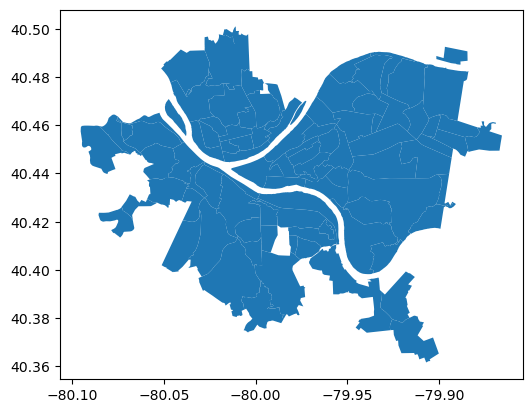

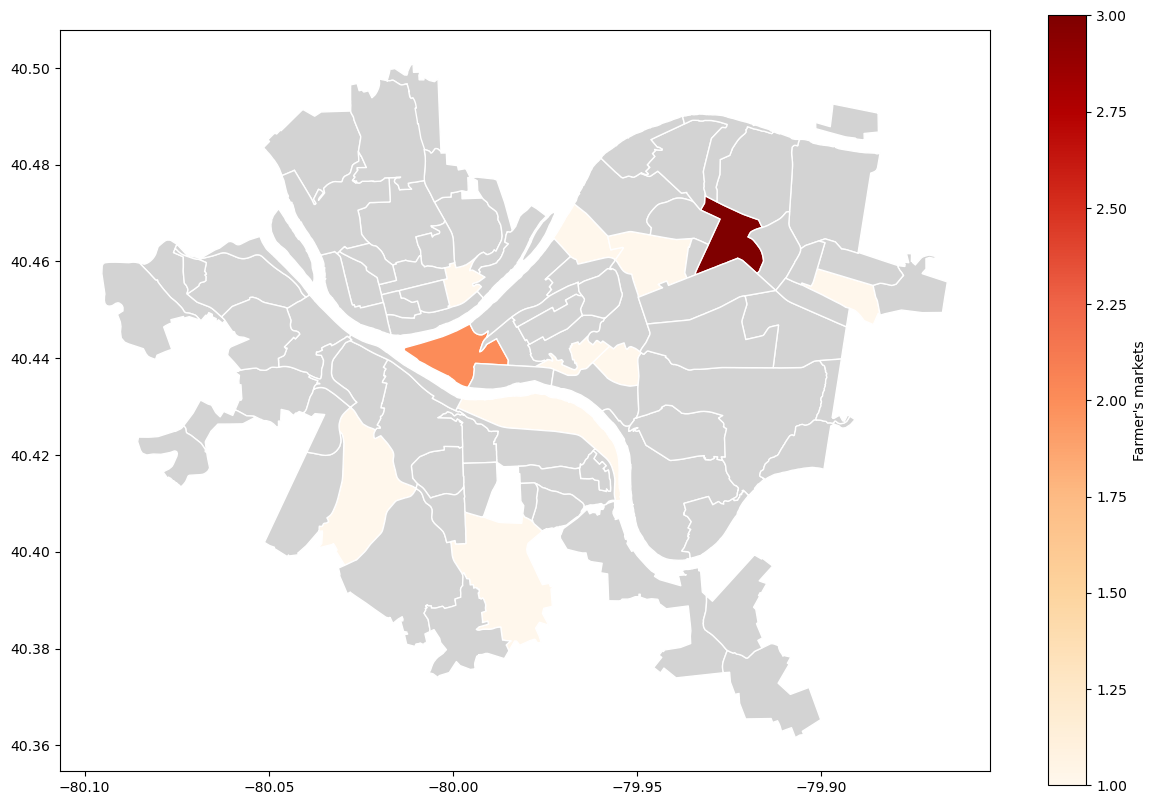

In [82]:

#neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
plt.show()

neighborhoods = neighborhoods.merge(market_counts, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
neighborhoods[['hood','market_count','geometry']]

neighborhoods.plot(column='market_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Farmer's markets"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

**Here I used the technique shown in Lab 9, merging your dataframe with the dataframe contained in the neighborhoods files and using the shape file also contained in that zip to put your data over a map of the city, to do just that.**

## Calculation + total map
We made it so that one staircase was the base unit. Therefore one water feature has the weight of 6 staircases, and one grocery store has the weight 50 staircases. We made a new column within the larger neighborhoods dataframe, which now contained all of our dataframes, and assigned that the name "totalPoints".

In [86]:
#answer calculation
neighborhoods["totalPoints"] = neighborhoods["stairs_count"] + neighborhoods["water_count"] * 6 + neighborhoods["market_count"] * 50
print(neighborhoods[['hood', 'stairs_count', 'water_count', 'market_count', 'totalPoints']].sort_values('totalPoints', ascending=False).head())

                         hood  stairs_count  water_count  market_count  \
77               East Liberty             1            6           3.0   
5   Central Business District             7            4           2.0   
32                    Carrick            39            6           1.0   
40                  Beechview            42            5           1.0   
31                 Bloomfield             7            8           1.0   

    totalPoints  
77        187.0  
5         131.0  
32        125.0  
40        122.0  
31        105.0  


**Here, we did the same thing that we all did individually, and plotted our merged data with totalPoints as the metric for the heatmap.**

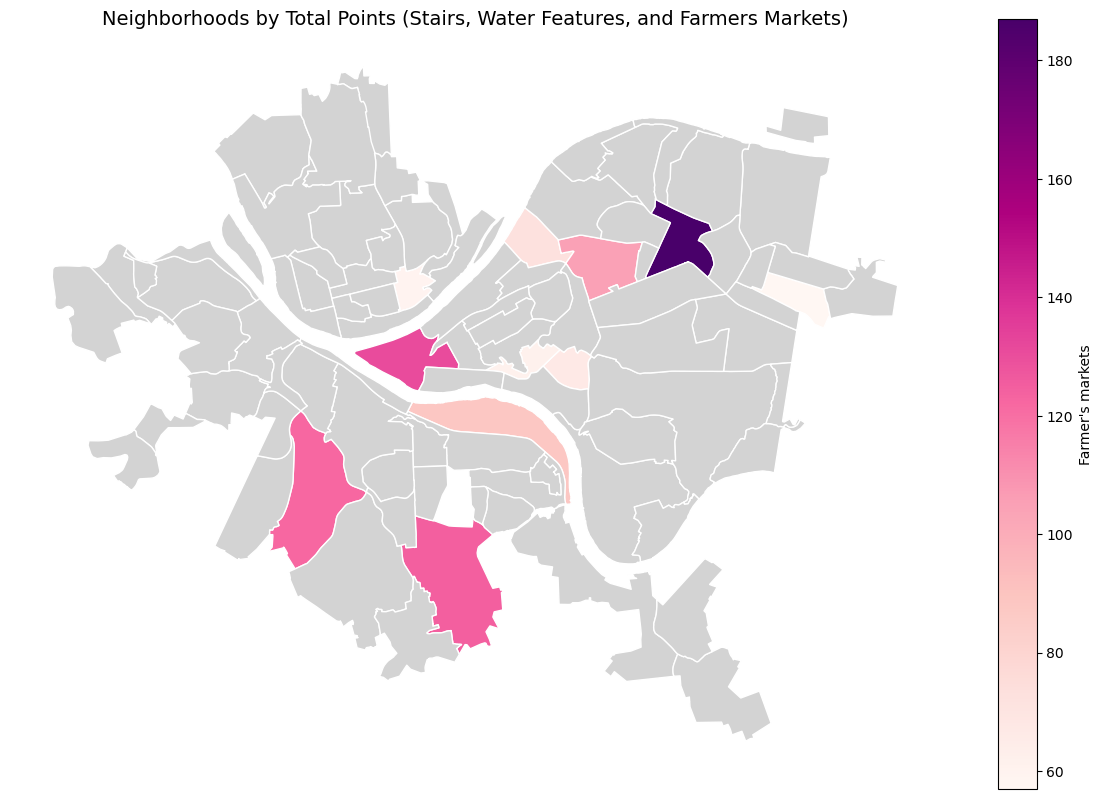

In [100]:
map = neighborhoods.plot(column='totalPoints', # set the data to be used for coloring
               cmap='RdPu',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Farmer's markets"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
map.set_title("Neighborhoods by Total Points (Stairs, Water Features, and Farmers Markets)", fontsize=14)
map.set_axis_off()
plt.show()

# The Best Neighborhood
In the end we found that you are most likely to slip and fall in East Liberty, though South Side Slopes wins for number of stairs and Squirrel Hill South has the most water features. The weight of 50 points per farmers market means that there are the equivalent to 150 stairs in East Liberty; at the end of the day, banana peels are the most hazardous slipping risk in our lives, and innocent people slip on them every day. East Liberty wins for the neighborhood where you are most likely to slip. 

# Conclusion




- Henry Unkefer - After finding out that our data shows East Liberty is the most dangerous to slip, it shook me to my core. I was thinking that Oakland would be the final result  of the data due to the abundance of activity, however I was incorrect.
- Erika Roa - Our data analysis showed that East Liberty is the best based on the weight we used. My personal favorite neighborhood is South Side Slopes because it sounds like it would be the best place to slip and fall. If I fell in a place with “slope” in the name, I really can’t be mad.
- Miles Fraser - I like East Liberty, I went to the Target there after school constantly. I of course slipped on banana peels all the time; it didn’t surprise me at all to see this as the final result. 